<a href="https://colab.research.google.com/github/JavierMarin24/ADA-Informes/blob/main/Informe%208%20OptimalBST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Problema de Optimización**

Los problemas de optimización son de los más comunes que se pueden encontrar en cualquier tipo de trabajo. Estos buscan la máxima eficiencia para la resolución de problemas, en otras palabras, maximizan o minimizan el valor de una función.

El problema planteado en este informe es el de reducir la cantidad de nodos visitados de un árbol en la búsqueda de datos.

A continuación se presentan la entrada y salida esperada para este problema:

Entrada: Secuencia ordenada de n claves: $K=\left<k_1,k_2,...,k_n\right>$. Cada clave $k_i$ tiene una probabilidad $p_i$ de ser buscada. Existen claves ficticias $d_i$ que representan búsquedas fallidas con $k_{i-1} \leq d_i \leq k_i$. Cada clave $d_i$ tiene una probabilidad $q_i$ de ser buscada. La suma de probabilidades debe ser uno, es decir: $\sum\limits_{i=1}^n p_i + \sum\limits_{j=0}^n q_i = 1$


Salida: Árbol de búsqueda óptimo, es decir, un árbol que minimice la cantidad esperada de nodos visitados (costo esperado) y el costo mínimo esperado.

# **2. Descripción del Algoritmo**

El algoritmo que se presenta para solucionar el problema es el de **Árbol de Búsqueda Óptimo**.

Para la implementación del algoritmo se presentan las siguientes 2 opciones:


### **2.1 Bottom Up**

Para esta implementación se tiene como entrada lo siguiente: 

*   Un arreglo $arrayKeys$ el cual contiene las claves de cada nodo.
*   Un arreglo $arrayProb$ con la probabilidad de cada nodo $p_{i}$ con clave $k_{i}$.

El algoritmo posee los siguientes pasos:

1.Creación de 3 matrices de dimensión $(n+2)*(n+2)$ siendo $n$ la cantidad de claves del arreglo $arrayKeys$. Las matrices corresponden a $matrizCosto$, $matrizProb$ y $matrizRaiz$ las cuales guardan los costos, probabilidades y la raiz que optimiza el costo respectivamente.

2. Se calcula el valor de $matrizCosto_{i,j}$ y $matrizProb_{i,j}$ , recorriendo la matriz siguiendo diagonales desde la diagonal principal (problemas más pequeños) hasta $j-i = n-1$.

3. El valor de $matrizProb_{i,j} = matrizProb_{i,j-1} + arrayProb[j-1]$.

4. El valor de $matrizCosto_{i,j} = matrizProb_{i,j} + matrizCosto_{i,r-1} + matrizCosto_{r+1,j}$ , siendo $r$ un valor que va desde $i$ a $j$. El valor que se almacena es el mínimo de todos los valores obtenidos y se guarda en $matrizCosto_{i,j}$.La raíz que minimiza el costo se guarda en $matrizRaiz_{i,j}$.

5. Una vez finalizan las iteraciones, se retorna el valor guardado en $matrizCosto_{1,n}$ el cual es el costo esperado del árbol óptimo.








### **2.1.1 Código Bottom Up**

In [50]:
import numpy as np
from math import inf

def optimalBST(arrayKeys, arrayProb,verbose):
  global subproblemas
  cantKeys = len(arrayKeys)  #cantidad de llaves

  if(verbose == True):
    print("Keys", arrayKeys)
    print("Probabilidad", arrayProb,"\n")

  matrizCosto = np.zeros((cantKeys+2,cantKeys+2)) 
  matrizProb = np.zeros((cantKeys+2,cantKeys+2))
  #Doble for que recorre la diagonal principal y la matriz superior, se recorre siempre en forma de diagonal. 
  for i in range(0,cantKeys+1):
    for j in range(1, cantKeys+1-i): 
      matrizProb[j][i+j] = matrizProb[j][i+j-1] + arrayProb[i+j-1] #se calcula la probabilidad en la posición evaluada

      if(verbose == True):
        print("Se calcula la probabilidad en matrizProb[",j,"][",i+j,"] cuyo resultado da: ", matrizProb[j][i+j],"\n")

      minimo = inf
      for raiz in range (j,i+j+1): #se recorren todas las raices posibles para esa posición
        
        subproblemas = subproblemas + 1
        costoParcial = matrizProb[j][i+j] + matrizCosto[j][raiz-1] + matrizCosto[raiz+1][i+j] #fórmula que encuentra el costo
        if(verbose == True):
          print("Para r = ", raiz,"\n")
          print("El costo es: ", costoParcial,"\n")

        if(costoParcial<minimo): #se busca el mínimo costo entre las raíces trabajadas
          minimo = costoParcial
      matrizCosto[j][i+j] = minimo
      if(verbose == True):
          print("El menor costo entre las raíces calculadas para matrizProb[",j,"][",i+j,"] es: ", minimo, "\n")
  
  if(verbose == True):
    print("La matriz de probabilidades queda de la forma: \n", matrizProb,"\n")
    print("La matriz de costos queda de la forma: \n", matrizCosto,"\n")
    print("El costo mínimo esperado final es: ",matrizCosto[1][cantKeys])
  
  return( matrizCosto[1][cantKeys])
 
    



### **2.1.2 Ejemplo de ejecución**

In [51]:
arrayKeys=[1,2,3,4]
arrayProb=[0.2,0.3,0.15,0.35]
subproblemas = 0
costo = optimalBST(arrayKeys, arrayProb, False)
print("El costo mínimo esperado es: ", costo)
print("Subproblemas: ", subproblemas)

El costo mínimo esperado es:  1.85
Subproblemas:  20


### **2.1.3 Implementación con Verbose**

In [52]:
arrayKeys=[1,2,3,4]
arrayProb=[0.2,0.3,0.15,0.35]
subproblemas = 0
costo = optimalBST(arrayKeys, arrayProb, True)

Keys [1, 2, 3, 4]
Probabilidad [0.2, 0.3, 0.15, 0.35] 

Se calcula la probabilidad en matrizProb[ 1 ][ 1 ] cuyo resultado da:  0.2 

Para r =  1 

El costo es:  0.2 

El menor costo entre las raíces calculadas para matrizProb[ 1 ][ 1 ] es:  0.2 

Se calcula la probabilidad en matrizProb[ 2 ][ 2 ] cuyo resultado da:  0.3 

Para r =  2 

El costo es:  0.3 

El menor costo entre las raíces calculadas para matrizProb[ 2 ][ 2 ] es:  0.3 

Se calcula la probabilidad en matrizProb[ 3 ][ 3 ] cuyo resultado da:  0.15 

Para r =  3 

El costo es:  0.15 

El menor costo entre las raíces calculadas para matrizProb[ 3 ][ 3 ] es:  0.15 

Se calcula la probabilidad en matrizProb[ 4 ][ 4 ] cuyo resultado da:  0.35 

Para r =  4 

El costo es:  0.35 

El menor costo entre las raíces calculadas para matrizProb[ 4 ][ 4 ] es:  0.35 

Se calcula la probabilidad en matrizProb[ 1 ][ 2 ] cuyo resultado da:  0.5 

Para r =  1 

El costo es:  0.8 

Para r =  2 

El costo es:  0.7 

El menor costo entre las raíc

### **2.2 Recursivo**

Para esta implementación se recibe la misma entrada que en **bottom up** agregando también dos índices $i$ y $j$ que respresentan las claves inicial y final del subarbol que se evalua en la llamada recursiva. 

El algoritmo posee los siguientes pasos: 

1. Se calcula la suma de todas las probabilidades desde $k_i$ hasta $k_j$ .

2. Se toma cada nodo $i$ como raiz del árbol.

3. Se calcula recursivamente el subárbol óptimo izquierdo y derecho a partir de la raíz seleccionada

4. El costo esperado se calcula como el costo del subárbol izquierdo más el costo del subárbol derecho más la suma de las probabilidades.

5. Se guarda el costo **mínimo** entre todos los costos obtenidos.

6. Se reconstruye el árbol a partir de la raíz y los subárboles que minimizan el costo.

7. Se retorna el costo mínimo esperado.

### **2.2.1 Código Recursivo**

In [25]:
from math import inf

def optimalCost(arrayProb, i, j): 
    global llamadaRecursiva 
    # Caso Base
    if j < i:     
        return 0
    if j == i:     
        return arrayProb[i]
     
    fsum = Sum(arrayProb, i, j)
    Min = inf

    for r in range(i, j + 1):
      llamadaRecursiva = llamadaRecursiva + 1
      A=optimalCost(arrayProb, i, r - 1)
      llamadaRecursiva = llamadaRecursiva + 1
      B=optimalCost(arrayProb, r + 1, j)
      cost = A+B
        #cost = (optimalCost(arrayProb, i, r - 1) +
         #       optimalCost(arrayProb, r + 1, j))
      if cost < Min:
            Min = cost
     
    # Retorna valor mínimo
    return Min + fsum
 
def optimalBST2(arrayKeys, arrayProb, n):
     
    return optimalCost(arrayProb, 0, n - 1)
 
def Sum(arrayProb, i, j):
    s = 0
    for k in range(i, j + 1):
        s += arrayProb[k]
    return s
 


     

### **2.2.2 Ejemplo de Ejecución**

In [27]:
arrayKeys=[1,2,3,4]
arrayProb=[0.2,0.3,0.15,0.35]
llamadaRecursiva = 0
n = len(arrayKeys)
print("El costo mínimo esperado es: ", optimalBST2(arrayKeys, arrayProb, n))
print("Llamadas recursivas: ", llamadaRecursiva)

El costo mínimo esperado es:  1.85
Llamadas recursivas:  44


### **2.3 Ejemplo**

arrayKeys=[1,2,3,4]
arrayProb=[0.2,0.3,0.15,0.35]

Considerando arrayKeys como $K$ y arrayProb como $P$.

$K = [1,2,3,4]$

$P = [0.2,0.3,0.15,0.35]$

Se inicializan las matrices $C$ (costos) y $W$ (probabilidad) con valor 0 bajo la diagonal principal y los valores $P[i]$ en cada posición $C_{i,i}$ y $W_{i,i}$.

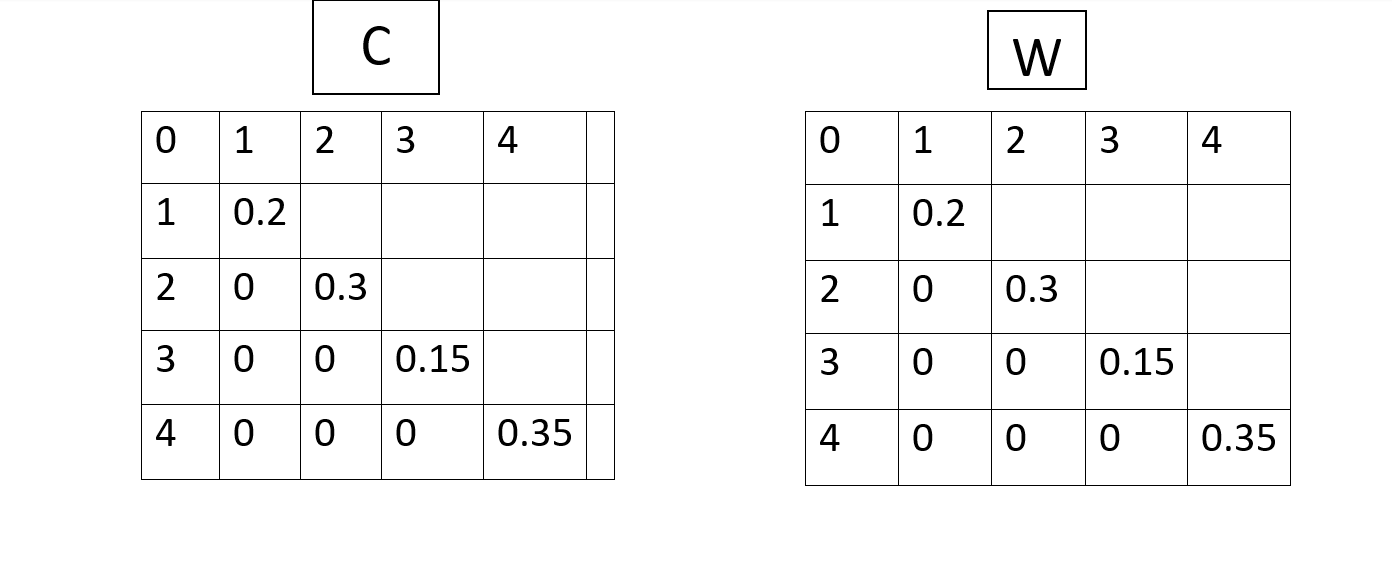

Para hacer los calculos se tienen las siguientes 2 fórmulas:

$W_{i,j} = W_{i,j-1} + P[j]$

$C_{i,j} = W_{i,j} + C_{i,r-1} + C_{r+1,j}$ 

Recordar que $r$ va de $i$ hasta $j$

Ahora se debe avanzar por las diagonales superiores con respecto a la principal, por lo tanto se empieza calculando el costo en $C_{1,2}$.

Se calcula primero $W_{1,2} = W_{1,1} + P[2] = 0.2 + 0.3 = 0.5$ 

Se tiene que r va desde $i=1 a j=2$

Para $r=1$

$C_{1,2} = W_{1,2} + C_{1,0} + C_{2,2} = 0.5 + 0 + 0.3 = 0.8$

Para $r=2$

$C_{1,2} = W_{1,2} + C_{1,1} + C_{3,2} = 0.5 + 0.2 + 0 = 0.7$

Como es visible, la raíz que minimiza el costo es $r=2$ ya que $0.7<0.8$ por lo tanto $C_{1.2} = 0.7$

Las matrices ahora quedan de la forma: 

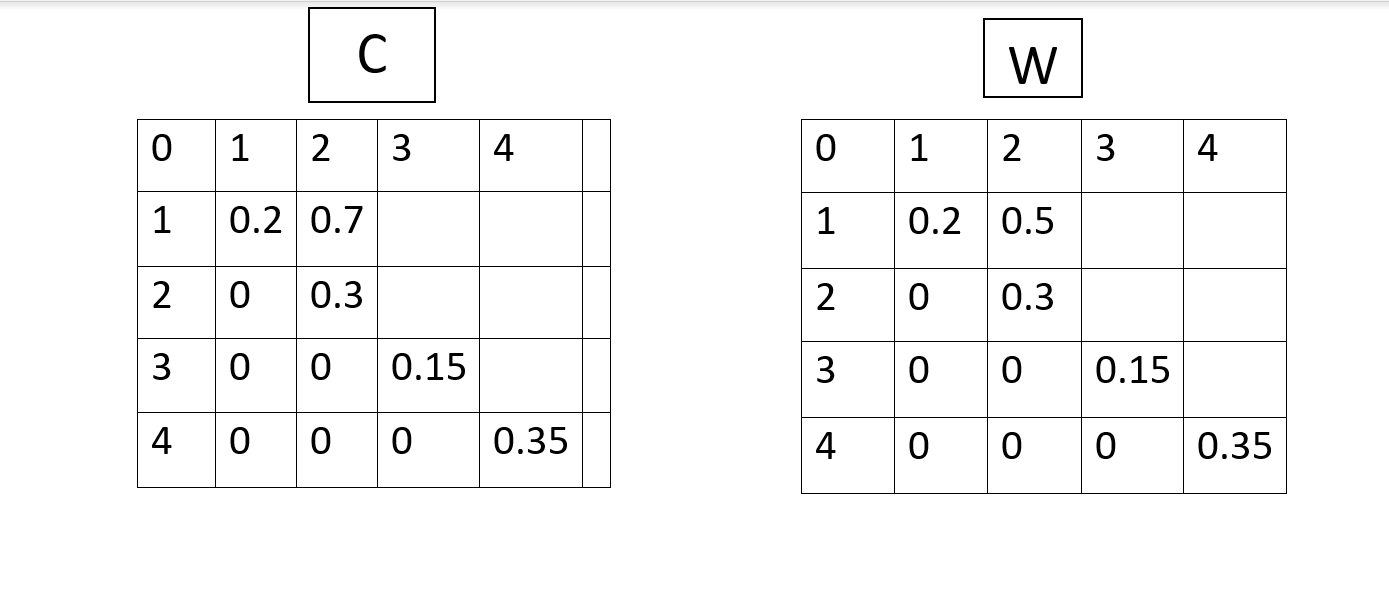

Siguiendo la diagonal, se repite el mismo proceso para calcular $C_{2,3}$ y $C_{3,4}$ quedando de la forma: 

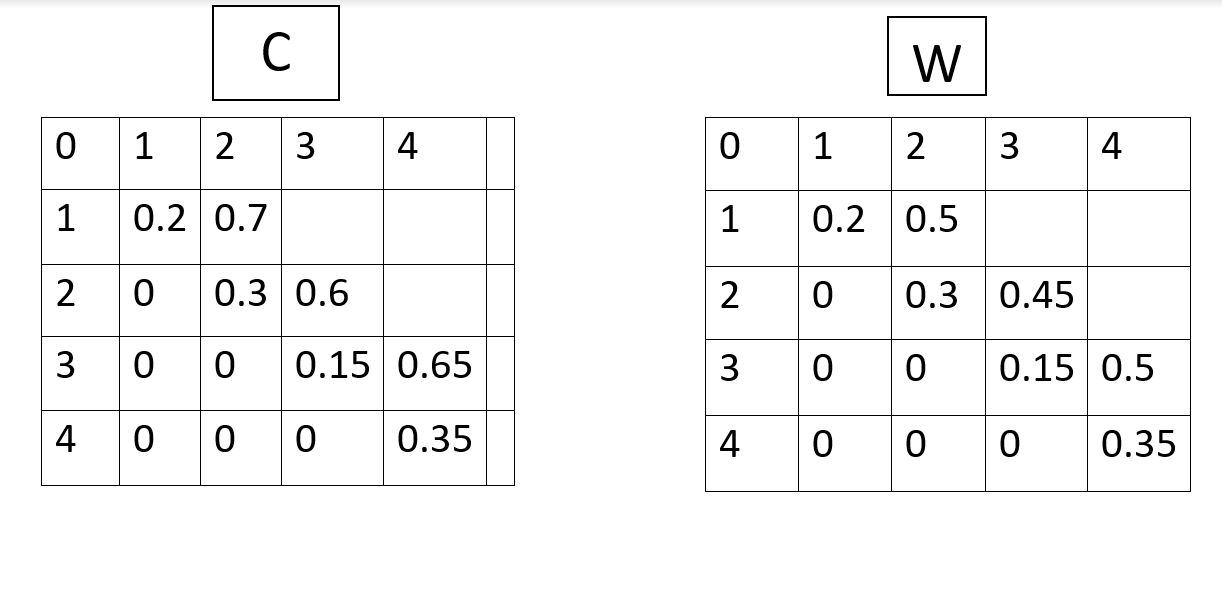

Ahora se avanza a la siguiente diagonal, se debe calcular $C_{1,3}$

$W_{1,3} = W_{1,2} + P[3] = 0.5 + 0.15 = 0.65$

Para $r=1$ 

$C_{1,3} = W_{1,3} + C_{1,0} + C_{2,3} = 0.65 + 0 + 0.6 = 1.25$

Para $r=2$

$C_{1,3} = W_{1,3} + C_{1,1} + C_{3,3} = 0.65 + 0.2 + 0.15 = 1$

Para $r=3$

$C_{1,3} = W_{1,3} + C_{1,2} + C_{4,3} = 0.65 + 0.7 + 0 = 1.35$

Como es visible, la raíz que minimiza el costo es $r=2$ ya que $1<1.25<1.35$ por lo tanto $C_{1.3} = 1$

Se repite el proceso para calcular $C_{2,4}$

Las matrices ahora quedan de la forma: 



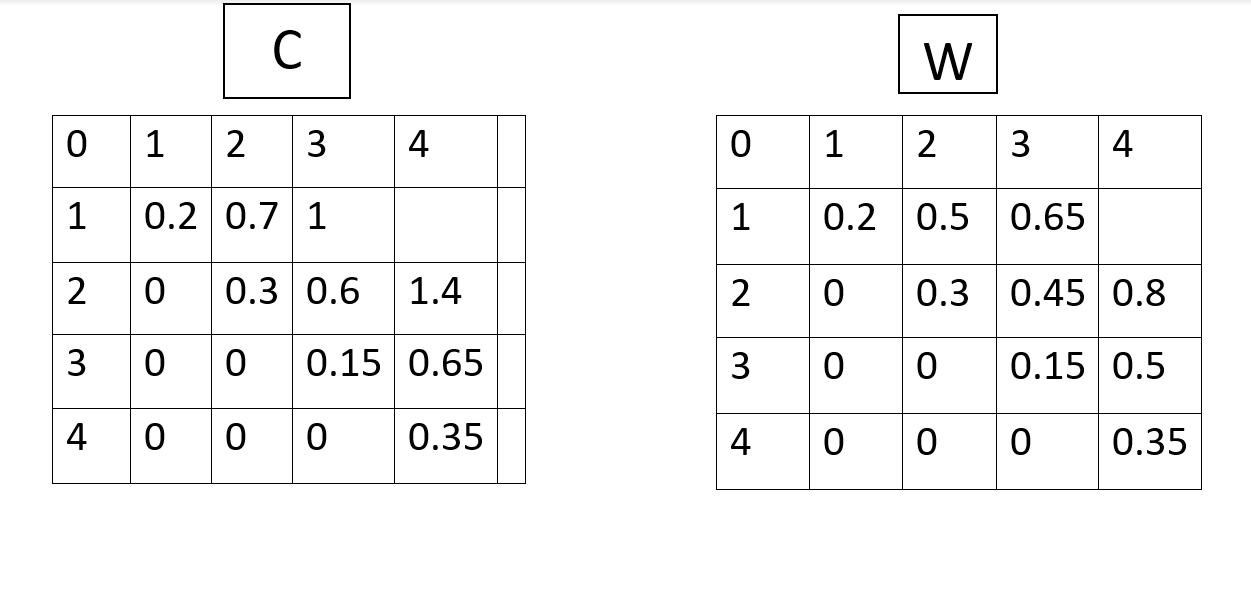

Para finalizar, se calcula el costo de $C_{1,4}$ para el cual se deben evaluar las raices desde 1 hasta 4 donde la se obtiene el menor valor que queda de la forma $C_{1,4} = 1.85$.

Finalmente, ambas matrices quedan de la forma: 

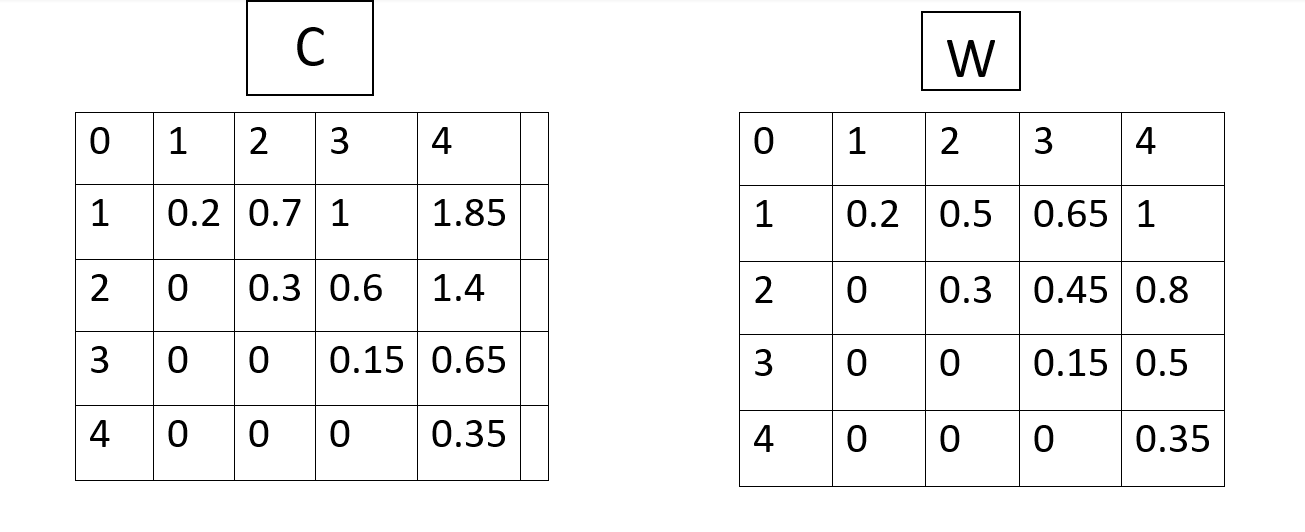

Una vez se obtienen las matrices finales, se retorna $C_{1,4} = 1.85$ el cual es el costo mínimo esperado buscado por el usuario.

# 3. Correctitud

### **Teorema 1: Correctitud de Optimal BST (bottom-up)**

*El algoritmo **Optimal BST** retorna correctamente el costo esperado mínimo para un árbol con claves $k_1 \ldots k_n$*

## Prueba del Teorema

### Subestructura óptima

La subestructura óptima para este algoritmo considera que, si un árbol $T$ con claves $k_{i} \ldots k_{j}$ es óptimo, necesariamente sus subárboles también deben serlo. Si un subárbol no lo fuera, estaríamos diciendo que existe otro subárbol con un menor costo esperado. De cumplirse este caso, estaríamos contradiciendo la optimalidad de $T$.

Además, sabemos que para un árbol con claves $k_i \ldots k_j$ existe una clave $k_{r}$ para la cual el subárbol izquierdo con claves $k_i \ldots k_{r-1}$ y el subárbol derecho con claves $k_{r+1} \ldots k_{j}$ son óptimos. Es decir, si seleccionamos cada una de las claves del árbol como raíz, nos aseguramos de encontrar un árbol de búsqueda óptimo.

Es importante notar que al elegir uno de los nodos extremos como raíz, obtendremos un subárbol vacío. En la práctica, debemos considerar que cada subárbol contiene, además de claves $k_i \ldots k_j$, claves ficticias $d_{i-1} \ldots d_j$, que igualmente serán consideradas para el cálculo de la solución. Por lo tanto, si escogemos como raíz la clave $k_i$, el subárbol izquierdo no contendrá claves reales, sino una única clave ficticia $d_{i-1}$. Del mismo modo, si escogemos como raíz la clave $k_j$, el subárbol derecho contendrá una única clave ficticia $d_j$.

### Solución recursiva

Definiremos $e[i, j]$ como el costo esperado mínimo de un árbol con claves $k_i \ldots k_j$. En primer lugar, consideremos los casos extremos. Cuando $k_r = k_i$, el costo para el subárbol izquierdo se expresará como $e[i,i-1]$, mientras que, cuando $k_r = k_j$, el costo para el subárbol derecho será $e[j+1,j]$. En ambos casos, el costo esperado $e[i, j]$ se calculará como $q_{i-1}$, que corresponde a la probabilidad de búsqueda de la única clave ficticia de estos árboles.

Para el caso general, calcularemos el costo mínimo considerando cada uno de los nodos como la raíz del árbol, con $r = i \ldots j$. Los costos para los subárboles izquierdo y derecho se expresarán como $e[i, r-1]$ y $e[r+1, j]$ respectivamente. Sin embargo, debemos considerar que cada uno de estos árboles pasará a ser un subárbol del nodo con clave $k_r$, por lo tanto, debemos calcular la variación que esto produce en el costo esperado. Recordemos que la fórmula del costo esperado es:

$E(T) = \sum\limits_{i=1}^{n} (h(k_i)+1) \cdot p_i + \sum\limits_{i=0}^{n} (h(d_i)+1) \cdot q_i$

$E(T) = 1 + \sum\limits_{i=1}^{n} h(k_i) \cdot p_i + \sum\limits_{i=0}^{n} h(d_i) \cdot q_i$

A partir de esta fórmula, obtenemos que al aumentar la profundidad del árbol en 1, el costo esperado aumenta con un factor equivalente a la suma de probabilidades de los nodos del árbol. Esta suma se define como:

$w(i, j) = \sum\limits_{k=i}^{j} p_k + \sum\limits_{k=i-1}^{j} q_k$

Por lo tanto, si $k_r$ es la raíz de un árbol óptimo con claves $k_i \ldots k_j$, tenemos que:

$e[i, j] = p_r + (e[i, r-1] + w(i, r-1)) + (e[r+1, j] + w(r+1, j))$

Observemos que:

$w(i, j) = p_r + w(i, r-1) + w(r+1, j)$

Reescribiendo la fórmula para $e[i, j]$:

$e[i, j] = e[i, r-1] + e[r+1, j] + w(i, j)$

Finalmente, la fórmula recursiva final para $e[i, j]$, considerando los casos extremos y todos los valores posibles de $r$ es: 

$   
e[i, j] = 
     \begin{cases}
       q_{i-1} &\quad\text{si } i = j+1 \\
       \min\limits_{i \leq r \leq j} \{e[i, r-1] + e[r+1, j] + w(i, j)\} &\quad\text{si } i \leq j \\
     \end{cases}
$

### Correctitud

Definiremos el tamaño del problema como la cantidad de claves reales contenidas en el árbol. Considerando esta definición, demostraremos la correctitud del algoritmo utilizando la siguiente propiedad invariante de bucle:

> Al comienzo de cada iteración $k = 1 \ldots n$, la matriz $E$ contiene la solución a todos los subproblemas de tamaño $0 \ldots k-1$.

**Inicialización**

El primer paso del algoritmo consiste en inicializar la matriz $E$ con el costo óptimo para los subárboles vacíos, es decir, aquellos que no contienen claves reales sino una sola clave ficticia. Un subárbol vacío $i \ldots j$ corresponde al caso base de la fórmula recursiva antes planteada, cumpliéndose que $i = j + 1$.

<img src="https://drive.google.com/uc?export=view&id=17TtKNkGt5wOsP-9IR3g3tLksoceV5Llz" width="300"/>

Por lo tanto, al comienzo de la primera iteración ($k = 1$), se habrá calculado correctamente la solución a todos los subproblemas de tamaño 0.

**Mantención**

Asumiremos mediante inducción que, para cualquier $k \geq 1$, se cumple la propiedad, es decir, la matriz $E$ contiene la solución a todos los subproblemas de tamaño menor a $k$.

En primer lugar, notemos que para cada subárbol $i \ldots j$, el tamaño del problema se calcula como $k = j - i + 1$. Además, sabemos que para cualquier $k \geq 1$, la fórmula utilizada para calcular el costo esperado será $e[i, j] = \min\limits_{i \leq r \leq j} \{e[i, r-1] + e[r+1, j] + w(i, j)\}$

Para calcular el costo esperado, se considera cada clave como una posible raíz del árbol óptimo. Sabemos que:

*   El subárbol izquierdo contiene los nodos $i \ldots r-1$. En el peor de los casos, cuando $r = j$, se generará un subproblema de tamaño $k_l = j - i$
*   El subárbol derecho contiene los nodos $r+1 \ldots j$. En el peor de los casos, cuando $r = i$, se generará un subproblema de tamaño $k_r = j - i$

En ambos casos, se cumple que el tamaño del problema original $k$ es mayor al tamaño de los subproblemas resultantes. Además, por la hipótesis inductiva, sabemos que la matriz contiene la solución para estos subproblemas.

Por último, para calcular $w(i,j)$, utilizamos la fórmula $w(i,j) = w(i,j-1) + p_{j-1} + q_{j}$. Mediante un razonamiento similar, podemos formular que la matriz $W$ contiene el valor de $w(i,j)$ para todos los subproblemas de tamaño menor a $k$. Luego, el valor de $w(i,j-1)$ será conocido, y podremos calcular correctamente la suma de probabilidades para el subárbol $i \ldots j$.

<img src="https://drive.google.com/uc?export=view&id=1OPuF-AitdoqiiMT_ViQK4ZUk1dcBFMIz" width="1050"/>

**Correctitud**

Finalmente, como la propiedad invariante es verdadera al inicio del bucle y se mantiene en cada iteración, podemos decir que al finalizar la $k$-ésima iteración del algoritmo, se obtiene el costo esperado para el subárbol $1 \ldots n$, que corresponde a la solución del problema inicial. $\Box$


# 4. Tiempo de ejecución y complejidad espacial

### **Teorema 2: Tiempo de ejecución del algoritmo Optimal BST (recursivo)**

*El algoritmo **Optimal BST** recursivo tiene un tiempo de ejecución $\Theta(3^n)$.*

## Prueba del teorema

Notemos que el algoritmo calcula recursivamente la solución para el subárbol izquierdo y derecho a partir de la raíz $r$, la cual varía entre 1 y $n$. A partir de esto, podemos expresar el tiempo de ejecución del algoritmo mediante la siguiente función de recurrencia:

$   
T(n) = 
     \begin{cases}
       \Theta(1) &\quad\text{si } n = 0 \\
       \sum\limits_{r=1}^{n} T(r-1) + T(n-r) &\quad\text{si } n \geq 1 \\
     \end{cases}
$

Desarrollando la fórmula para $n \geq 1$, nos queda:

$T(n) = T(0) + \ldots + T(n-1) + T(n-1) + \ldots + T(0)$

$T(n) = 2 \cdot [T(0) + T(1) + ... + T(n-1) ]$

$T(n) = 2 \cdot \sum\limits_{r=1}^{n} T(r-1)$

Luego, podemos demostrar por inducción que $T(n) = 3^n$. Para el caso base, tenemos que $T(0) = 3^0 = 1$. Aplicando la hipótesis inductiva a la ecuación anterior, obtenemos:

$T(n) = 1 + 2 \cdot \sum\limits_{r=1}^{n} 3^{r-1}$

$T(n) = 1 + 2 \cdot \frac{3^n - 1}{3-1}$

$T(n) = 1 + 3^n - 1$

$T(n) = 3^n$

Por lo tanto, la complejidad temporal del algoritmo Optimal BST recursivo es $\Theta(3^n)$. $\Box$

### **Teorema 3: Tiempo de ejecución del algoritmo Optimal BST (bottom-up)**

*El algoritmo **Optimal BST** implementado con programación dinámica tiene un tiempo de ejecución $\Theta(n^3)$.*

## Prueba del teorema

Para demostrar el teorema, calcularemos matemáticamente la cantidad de subproblemas que debe resolver este algoritmo. Observemos que la cantidad de subproblemas corresponde al número de subárboles a los cuales se calcula el costo esperado mínimo. Estos valores son almacenados en una matriz triangular superior, en las casillas que se muestran en la figura ($n = 5$).

<img src="https://drive.google.com/uc?export=view&id=11dEi4btP5Y6Vcw8FGj41ccUOeoZ-5xpM" width="300"/>

Generalizando, para un problema de tamaño $n$ se ocupará la mitad de casillas de una matriz $n \times n$, es decir, se resolverán exactamente $\frac{n^2}{2}$ subproblemas. Por lo tanto, podemos decir que la cantidad de subproblemas a resolver tiene complejidad $O(n^2)$.

Luego, cada subproblema es resuelto con la fórmula:

$  
e[i,j] = 
     \begin{cases}
       q_{i-1} &\quad\text{si } j = i - 1\\
       \min\limits_{i \leq r \leq j} e[i,r-1] + e[r+1,j] + w[i,j] &\quad\text{si } i \leq j\\
     \end{cases}
$

Como se puede ver, calcular este resultado requiere iterar por todas las raíces posibles que puede tener el subárbol $i \ldots j$. Por lo tanto, encontrar la solución a cada subproblema tiene un tiempo de $O(n)$.

Por último, reconstruir el árbol con la función `construct_optimal_bst` tiene un tiempo de ejecución $O(n)$.

Considerando esto, podemos calcular el tiempo total del algoritmo con la función $T(n) = f(n) \cdot g(n) + h(n)$, donde $f(n)$ corresponde a la cantidad de subproblemas, $g(n)$ corresponde al tiempo necesario para resolver cada subproblema, y $h(n)$ es el tiempo empleado en reconstruir la solución final. Reemplazando, obtenemos:

$T(n) = O(n^2) \cdot O(n) + O(n)$

$T(n) = O(n^3)$

Finalmente, notemos que no existe un peor ni un mejor caso para este algoritmo. Puesto que se trata de un algoritmo de **optimización**, se considerarán todos los casos posibles para encontrar la solución final. Debido a esto, podemos decir que el tiempo ocupado por el algoritmo solo depende del tamaño del problema, y por lo tanto, podemos expresar su complejidad con la notación $\Theta(n^3)$. $\Box$





# **5. Experimentos**

### **5.1 Tiempo de Ejecución**

### **Bottom Up $V/S$ Recursivo**

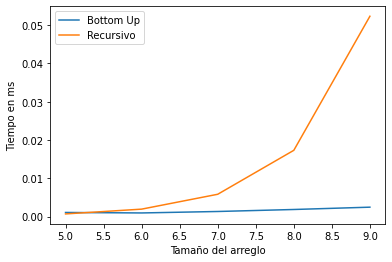

In [35]:
import random
import numpy as np

def optimal_bst_instance_generator(n):
    keys = sorted(random.sample(range(1, 100), n))
    arr = np.random.random(n*2+1)
    arr /= arr.sum()
    
    p = list(arr[:n]) # Probabilidad de las claves
    q = arr[n:] # Probabilidad de las claves ficticias
    return keys, p, q
    
keys, p, q = optimal_bst_instance_generator(10)
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random

x=[]; y=[]
y1=[]

for n in range(5,10):
  
  keys, p, q = optimal_bst_instance_generator(n)
  largo = len(keys)
  
  t1 = repeat(setup="from __main__ import optimalBST", stmt=f"optimalBST({keys},{p})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import optimalBST2", stmt=f"optimalBST2({keys},{p},{largo})", repeat=1, number=10)
  
  x.append(n)
  y.append(t1)
  y1.append(t2)


plt.plot(x, y)
plt.plot(x, y1)
plt.legend(["Bottom Up", "Recursivo"])

plt.xlabel('Tamaño del arreglo')
plt.ylabel('Tiempo en ms')
plt.show()


### **5.1.1 Análisis de Resultados**

Como se ve en la gráfica y como era de esperarse, el tiempo de ejecución del algoritmo se dispara exponencialmente y marca una clara lentitud con respecto a la implementación de Bottom Up que a pesar de tener un timpo $O(n^3)$ se muestra en la gráfica con un crecimiento polinomial ya que el método recursivo tiene un tiempo mucho mayor $O(3^n)$.

### *5.1.2 Gráfica Bottom Up*

A continuación se muestra la gráfica de forma independiente del algoritmo mediante Bottom Up para obtener un resultado más realista del tiempo de ejecución.

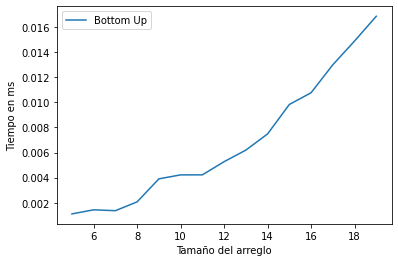

In [42]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random

x=[]; y=[]
y1=[]

for n in range(5,20):
  
  keys, p, q = optimal_bst_instance_generator(n)
  
  t1 = repeat(setup="from __main__ import optimalBST", stmt=f"optimalBST({keys},{p})", repeat=1, number=10)
  
  x.append(n)
  y.append(t1)
plt.plot(x, y)
plt.legend(["Bottom Up"])

plt.xlabel('Tamaño del arreglo')
plt.ylabel('Tiempo en ms')
plt.show()


### **5.1.3 Análisis de Resultados**

La gráfica muestra una curva representativa del tiempo $O(n^3)$ que posee el método de Bottom Up el cual es exponencial pero en la gráfica vista con anterioridad, la diferencia abismal que hay con el método recursivo genera que hayamos visto una curva polinomial y no una exponencial.